<a href="https://colab.research.google.com/github/gabrielmprata/anatel/blob/main/Anatel_PreProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

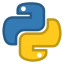        **ANATEL - Pré processamento dos dados históricos de Acessos Banda Larga Fixa**

---
>
**Dev**: Gabriel Prata
>
**Data de criação**:    01/04/2024
>
**Última modificação**: 06/04/2024
>
---

#**<font color=#85d338 size="6"> 1. Import libraries**

In [2]:
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#**<font color=#85d338 size="6"> 2. Carga dos dados**

As informações de acessos de **Banda Larga Fixa**, estão no sítio de dados abertos do governo federal, no link abaixo:
>
https://dados.gov.br/dados/conjuntos-dados/acessos---banda-larga-fixa
>
Será baixado um arquivo ZIP com todos os anos disponíveis.
>
Para esse projeto, selecionamos os seguintes arquivos de **2023**, para tratar:
>
Acessos_Banda_Larga_Fixa_2023.zip
>
Acessos_Banda_Larga_Fixa_2023_Colunas.zip



---



###**<font color=#85d338> 2.1 Arquivo Acessos_Banda_Larga_Fixa_2023.zip**

Esse arquivo contém as informações detalhadas em tuplas.

In [ ]:
#Arquivo detalhado com os meses em linhas #executado em 34s
acesso_bl_2023 = pd.read_csv('Acessos_Banda_Larga_Fixa_2023.zip', compression='zip', sep=';', decimal=',')

In [ ]:
acesso_bl_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400809 entries, 0 to 7400808
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Ano                    int64  
 1   Mês                    int64  
 2   Grupo Econômico        object 
 3   Empresa                object 
 4   CNPJ                   int64  
 5   Porte da Prestadora    object 
 6   UF                     object 
 7   Município              object 
 8   Código IBGE Município  int64  
 9   Faixa de Velocidade    object 
 10  Velocidade             float64
 11  Tecnologia             object 
 12  Meio de Acesso         object 
 13  Tipo de Pessoa         object 
 14  Tipo de Produto        object 
 15  Acessos                int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 903.4+ MB


In [ ]:
acesso_bl_2023.head()

,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Faixa de Velocidade,Velocidade,Tecnologia,Meio de Acesso,Tipo de Pessoa,Tipo de Produto,Acessos
0,2023,12,TELECOM AMERICAS,CLARO,66970229000167,Grande Porte,MG,Sete Lagoas,3167202,> 34Mbps,35.0000,HFC,Cabo Coaxial,Pessoa Física,INTERNET,209
1,2023,12,TELECOM AMERICAS,CLARO,66970229000167,Grande Porte,SP,Ribeirão Preto,3543402,> 34Mbps,125.0000,HFC,Cabo Coaxial,Pessoa Física,INTERNET,14250
2,2023,12,OUTROS,Mhnet Telecomunicacoes Ltda,5245502000104,Pequeno Porte,RS,Quatro Irmãos,4315313,> 34Mbps,58.5938,Wi-Fi,Cabo Coaxial,Pessoa Jurídica,INTERNET,5
3,2023,12,OUTROS,Mhnet Telecomunicacoes Ltda,5245502000104,Pequeno Porte,RS,Quatro Irmãos,4315313,> 34Mbps,48.8281,Wi-Fi,Cabo Coaxial,Pessoa Jurídica,INTERNET,1
4,2023,12,OUTROS,LINX TELECOMUNICAÇÕES LTDA,7695739000104,Pequeno Porte,SP,Hortolândia,3519071,2Mbps a 12Mbps,10.0000,ETHERNET,Cabo Coaxial,Pessoa Jurídica,INTERNET,1


###**<font color=#85d338> 2.2 Arquivo Acessos_Banda_Larga_Fixa_2023_Colunas.zip**

Arquivo agrupando o histórico de acessos em colunas.

In [4]:
#Arquivo agrupando com os meses em colunas #executado em 4s
acesso_bl_2023_colunas = pd.read_csv('Acessos_Banda_Larga_Fixa_2023_Colunas.zip', compression='zip', sep=';', decimal=',')

In [5]:
acesso_bl_2023_colunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880063 entries, 0 to 880062
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CNPJ                   880063 non-null  int64  
 1   Velocidade             880063 non-null  float64
 2   Município              880063 non-null  object 
 3   UF                     880063 non-null  object 
 4   Faixa de Velocidade    880063 non-null  object 
 5   Tecnologia             880063 non-null  object 
 6   Empresa                879979 non-null  object 
 7   Porte da Prestadora    879979 non-null  object 
 8   Tipo de Pessoa         880063 non-null  object 
 9   Tipo de Produto        880063 non-null  object 
 10  Código IBGE Município  880063 non-null  int64  
 11  Grupo Econômico        879979 non-null  object 
 12  Meio de Acesso         880063 non-null  object 
 13  2023-01                556703 non-null  float64
 14  2023-02                566546 non-nu

In [6]:
acesso_bl_2023_colunas.head()

,CNPJ,Velocidade,Município,UF,Faixa de Velocidade,Tecnologia,Empresa,Porte da Prestadora,Tipo de Pessoa,Tipo de Produto,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,14798740000120,1538.0,Belo Horizonte,MG,> 34Mbps,FTTH,ACESSOLINE TELECOMUNICACOES LTDA,Pequeno Porte,Pessoa Jurídica,INTERNET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,14798740000120,1538.0,Cotia,SP,> 34Mbps,FTTH,ACESSOLINE TELECOMUNICACOES LTDA,Pequeno Porte,Pessoa Jurídica,INTERNET,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,14798740000120,1538.0,Osasco,SP,> 34Mbps,FTTH,ACESSOLINE TELECOMUNICACOES LTDA,Pequeno Porte,Pessoa Jurídica,INTERNET,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,14798740000120,1538.0,Pinhalzinho,SC,> 34Mbps,FTTH,ACESSOLINE TELECOMUNICACOES LTDA,Pequeno Porte,Pessoa Jurídica,INTERNET,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,14798740000120,1538.0,Catanduvas,SC,> 34Mbps,FTTH,ACESSOLINE TELECOMUNICACOES LTDA,Pequeno Porte,Pessoa Jurídica,INTERNET,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0




---



#**<font color=#85d338 size="6"> 3. Análise de Dados Inicial**

###**<font color=#85d338> 3.1. Estatísticas Descritivas**

Compreende a organização, o resumo e, descrever os dados, que podem ser expressos em tabelas e gráficos.
>
Veremos a seguir alguns comandos para exibir algumas estatísticas descritivas.
>
---

In [ ]:
#	Quantidade de atributos e instâncias (linhas/colunas)
acesso_bl_2023.shape

(7400809, 16)

In [7]:
acesso_bl_2023_colunas.shape

(880063, 25)

In [ ]:
# verificando os tipos de dados de cada coluna do dataframe
acesso_bl_2023.dtypes

Ano                        int64
Mês                        int64
Grupo Econômico           object
Empresa                   object
CNPJ                       int64
Porte da Prestadora       object
UF                        object
Município                 object
Código IBGE Município      int64
Faixa de Velocidade       object
Velocidade               float64
Tecnologia                object
Meio de Acesso            object
Tipo de Pessoa            object
Tipo de Produto           object
Acessos                    int64
dtype: object

In [8]:
acesso_bl_2023_colunas.dtypes

CNPJ                       int64
Velocidade               float64
Município                 object
UF                        object
Faixa de Velocidade       object
Tecnologia                object
Empresa                   object
Porte da Prestadora       object
Tipo de Pessoa            object
Tipo de Produto           object
Código IBGE Município      int64
Grupo Econômico           object
Meio de Acesso            object
2023-01                  float64
2023-02                  float64
2023-03                  float64
2023-04                  float64
2023-05                  float64
2023-06                  float64
2023-07                  float64
2023-08                  float64
2023-09                  float64
2023-10                  float64
2023-11                  float64
2023-12                  float64
dtype: object

In [ ]:
# Mostra diversas informações do Dataframe em um único comando, e exibir o uso de memória
acesso_bl_2023.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400809 entries, 0 to 7400808
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Ano                    int64  
 1   Mês                    int64  
 2   Grupo Econômico        object 
 3   Empresa                object 
 4   CNPJ                   int64  
 5   Porte da Prestadora    object 
 6   UF                     object 
 7   Município              object 
 8   Código IBGE Município  int64  
 9   Faixa de Velocidade    object 
 10  Velocidade             float64
 11  Tecnologia             object 
 12  Meio de Acesso         object 
 13  Tipo de Pessoa         object 
 14  Tipo de Produto        object 
 15  Acessos                int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 5.2 GB


In [9]:
acesso_bl_2023_colunas.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880063 entries, 0 to 880062
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CNPJ                   880063 non-null  int64  
 1   Velocidade             880063 non-null  float64
 2   Município              880063 non-null  object 
 3   UF                     880063 non-null  object 
 4   Faixa de Velocidade    880063 non-null  object 
 5   Tecnologia             880063 non-null  object 
 6   Empresa                879979 non-null  object 
 7   Porte da Prestadora    879979 non-null  object 
 8   Tipo de Pessoa         880063 non-null  object 
 9   Tipo de Produto        880063 non-null  object 
 10  Código IBGE Município  880063 non-null  int64  
 11  Grupo Econômico        879979 non-null  object 
 12  Meio de Acesso         880063 non-null  object 
 13  2023-01                556703 non-null  float64
 14  2023-02                566546 non-nu

A função info() da biblioteca pandas, nos fornece um resumo do dataframe, sendo muito útil para ter uma visão geral do conjunto de dados.
>
Usando o parâmetro memory_usage = “deep”, saberemos exatamente quanto de memória o dataframe está utilizando.
>
Sendo assim, depois dos processos de transformações de dados saberemos se tivemos algum ganho de memoria no dataframe.
>
Inicialmente o dataframe detalhado está ocupando 5.2 Gigas de espaço.
>
O dataframe agrupado por coluna está ocupando 700 Mb de espaço.

In [ ]:
# Quantidade de valores únicos
acesso_bl_2023.nunique()

Ano                          1
Mês                         12
Grupo Econômico             25
Empresa                   9948
CNPJ                     10004
Porte da Prestadora          2
UF                          27
Município                 5297
Código IBGE Município     5570
Faixa de Velocidade          5
Velocidade               10782
Tecnologia                  27
Meio de Acesso               5
Tipo de Pessoa               2
Tipo de Produto              4
Acessos                  13985
dtype: int64

In [10]:
acesso_bl_2023_colunas.nunique()

CNPJ                     10004
Velocidade               10782
Município                 5297
UF                          27
Faixa de Velocidade          5
Tecnologia                  27
Empresa                   9948
Porte da Prestadora          2
Tipo de Pessoa               2
Tipo de Produto              4
Código IBGE Município     5570
Grupo Econômico             25
Meio de Acesso               5
2023-01                   4444
2023-02                   4434
2023-03                   4464
2023-04                   4489
2023-05                   4490
2023-06                   4506
2023-07                   4501
2023-08                   4536
2023-09                   4524
2023-10                   4621
2023-11                   4581
2023-12                   4535
dtype: int64

In [ ]:
# Quantidade de NaN/Missing/Nulls no dataframe
acesso_bl_2023.isnull().sum()

Ano                        0
Mês                        0
Grupo Econômico          324
Empresa                  324
CNPJ                       0
Porte da Prestadora      324
UF                         0
Município                  0
Código IBGE Município      0
Faixa de Velocidade        0
Velocidade                 0
Tecnologia                 0
Meio de Acesso             0
Tipo de Pessoa             0
Tipo de Produto            0
Acessos                    0
dtype: int64

Nesse DF 3 atributos, apresentam registros nulos, que deverão ser tratados na etapa de pre-processamento de dados.

In [11]:
# Quantidade de NaN/Missing/Nulls no dataframe
acesso_bl_2023_colunas.isnull().sum()

CNPJ                          0
Velocidade                    0
Município                     0
UF                            0
Faixa de Velocidade           0
Tecnologia                    0
Empresa                      84
Porte da Prestadora          84
Tipo de Pessoa                0
Tipo de Produto               0
Código IBGE Município         0
Grupo Econômico              84
Meio de Acesso                0
2023-01                  323360
2023-02                  313517
2023-03                  303234
2023-04                  308562
2023-05                  295543
2023-06                  293101
2023-07                  285597
2023-08                  283146
2023-09                  282269
2023-10                  274428
2023-11                  274625
2023-12                  281186
dtype: int64

#**<font color=#85d338> 4. Pré-Processamento de dados**

Após coletar e analisar os dados na etapa anterior, agora é o momento
de limpar, transformar e apresentar melhor os dados.
>
Assim poderemos obter, na próxima etapa, os melhores resultados possíveis nos algoritmos de
Machine Learning, ou simplesmente apresentar dados mais confiáveis para os clientes em soluções de
business intelligence.


---


###**<font color=#85d338> 4.1. Limpeza**

####**<font color=#85d338> 4.1.1 Nomenclatura**

Nessa etpa iremos alterar o nome dos atributos
>
Retirando o "espaços" entre os nomes, os acentos e os caractéres especiais


In [ ]:
#Renomeando as colunas
acesso_bl_2023.rename(columns={ 'Ano': 'ano',
                                'Mês': 'mes',
                                'Grupo Econômico': 'grupo_economico',
                                'Empresa': 'empresa',
                                'Porte da Prestadora': 'porte_prestadora',
                                'Município': 'municipio',
                                'Código IBGE Município': 'codigo_ibge',
                                'Faixa de Velocidade': 'faixa_velocidade',
                                'Meio de Acesso': 'meio_acesso',
                                'Tipo de Pessoa': 'tipo_pessoa',
                                'Tipo de Produto': 'tipo_produto'
                              },
                      inplace=True)

In [12]:
#Renomeando as colunas
acesso_bl_2023_colunas.rename(columns={ 'Ano': 'ano',
                                'Mês': 'mes',
                                'Grupo Econômico': 'grupo_economico',
                                'Empresa': 'empresa',
                                'Porte da Prestadora': 'porte_prestadora',
                                'Município': 'municipio',
                                'Código IBGE Município': 'codigo_ibge',
                                'Faixa de Velocidade': 'faixa_velocidade',
                                'Meio de Acesso': 'meio_acesso',
                                'Tipo de Pessoa': 'tipo_pessoa',
                                'Tipo de Produto': 'tipo_produto'
                              },
                      inplace=True)

####**<font color=#85d338> 4.1.2 Redundâncias**



Vamos eliminar as colunas que não iremos utilizar em nossas analises.
>
A ideia é ter um dataframe mais leve, e com pouco espaço em disco.

In [ ]:
acesso_bl_2023.drop(['CNPJ',
                     'municipio',
                     'codigo_ibge',
                     'faixa_velocidade',
                     'Velocidade',
                     'Tecnologia',
                     'tipo_produto'
                     ], axis=1, inplace= True)

In [13]:
acesso_bl_2023_colunas.drop(['CNPJ',
                     'municipio',
                     'codigo_ibge',
                     'faixa_velocidade',
                     'Velocidade',
                     'Tecnologia',
                     'tipo_produto'
                     ], axis=1, inplace= True)

####**<font color=#85d338> 4.1.3 Tratamento de Missings**

O arquivo agrupado em colunas foi o que mais apresentou campos nulos(missings/NaN).
>
Iremos tratar todas as colunas.

<Axes: >

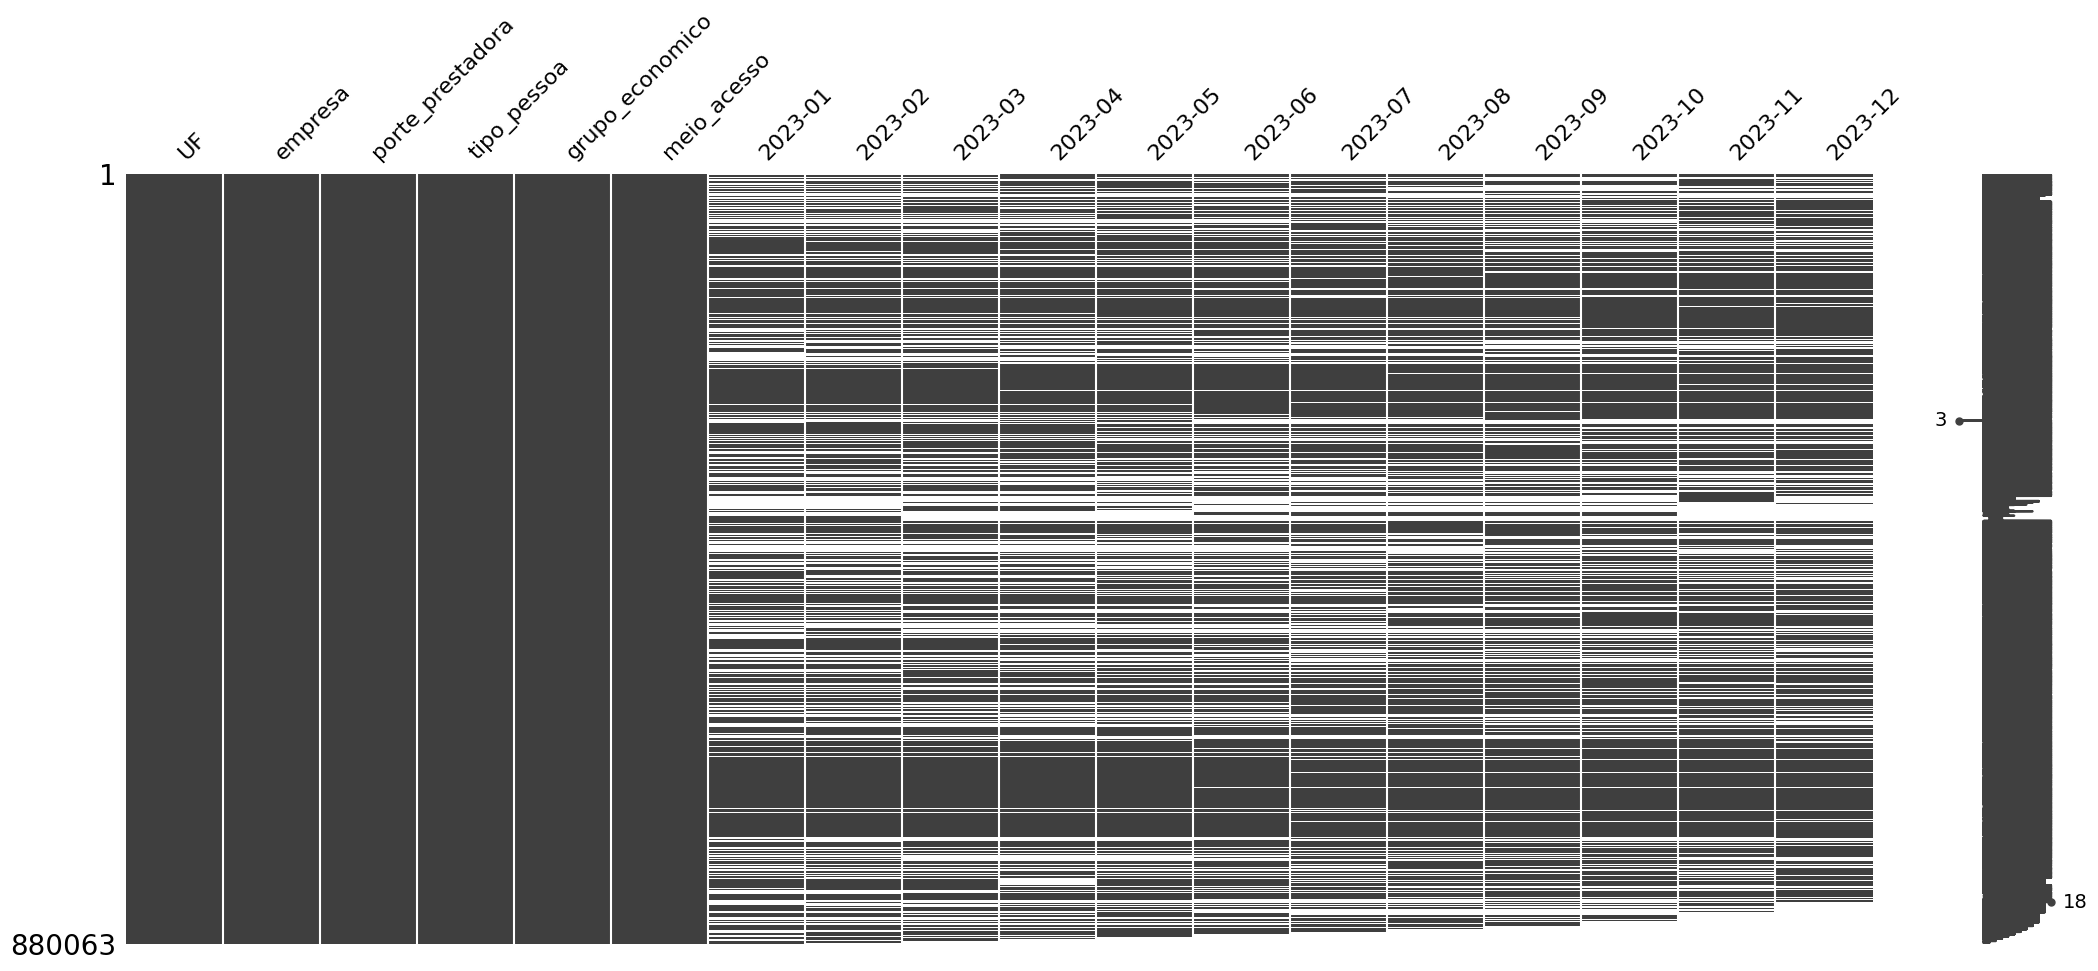

In [17]:
ms.matrix(acesso_bl_2023_colunas)

In [18]:
#Verificando o percentual de registros nulos
(acesso_bl_2023_colunas.isnull().sum()/acesso_bl_2023_colunas.shape[0]*100).round(2)

UF                   0.00
empresa              0.01
porte_prestadora     0.01
tipo_pessoa          0.00
grupo_economico      0.01
meio_acesso          0.00
2023-01             36.74
2023-02             35.62
2023-03             34.46
2023-04             35.06
2023-05             33.58
2023-06             33.30
2023-07             32.45
2023-08             32.17
2023-09             32.07
2023-10             31.18
2023-11             31.21
2023-12             31.95
dtype: float64

In [19]:
acesso_bl_2023_colunas['2023-01'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-02'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-03'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-04'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-05'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-06'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-07'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-08'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-09'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-10'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-11'].fillna(0, inplace=True)
acesso_bl_2023_colunas['2023-12'].fillna(0, inplace=True)

In [20]:
acesso_bl_2023_colunas.isnull().sum()

UF                   0
empresa             84
porte_prestadora    84
tipo_pessoa          0
grupo_economico     84
meio_acesso          0
2023-01              0
2023-02              0
2023-03              0
2023-04              0
2023-05              0
2023-06              0
2023-07              0
2023-08              0
2023-09              0
2023-10              0
2023-11              0
2023-12              0
dtype: int64

####**<font color=#85d338> 4.1.4 Outros**

Para reduzir mais o tamanho do DataFrame, vou substituir, no atributo: Tipo_pessoa
>
Os caracteres de Pessoa Juridica para PJ, e
>
Pessoa física para PF

In [ ]:
acesso_bl_2023.tipo_pessoa.value_counts(normalize=True)

PJ    0.584032
PF    0.415968
Name: tipo_pessoa, dtype: float64

In [ ]:
acesso_bl_2023.tipo_pessoa =  acesso_bl_2023.tipo_pessoa.str.replace('Pessoa Jurídica','PJ')
acesso_bl_2023.tipo_pessoa =  acesso_bl_2023.tipo_pessoa.str.replace('Pessoa Física','PF')



---



###**<font color=#85d338> 4.2 Redução da dimensionalidade**

Os datasets podem ter muitas características, e muitos algoritmos de Machine Learning funcionam melhor se a dimensionalidade for menor.

####**<font color=#85d338> 4.2.1 Agregação**

Também pode ser considerada uma técnica de redução de dimensionalidade, pois reduz o número de colunas e linhas do dataset.
>
O nosso dataset, é aberto por Municipio, e nesse momento não iremos analisar nessa granularidade.
>
Vamos criar um dataset agregado com a visão por UF, agrupandos os atributos que não se repetem.
>
Assim, será possivel fazer analises mais rápidas, e ter um dataset menor para usar no Github e Streamlit.

In [ ]:
bl_fixa_2023 = acesso_bl_2023.groupby(["ano",
                                              "mes",
                                              "grupo_economico",
                                              "empresa",
                                              "porte_prestadora",
                                              "UF",
                                              "meio_acesso",
                                              "tipo_pessoa"])['Acessos'].sum().reset_index()

In [ ]:
bl_fixa_2023.head()

,ano,mes,grupo_economico,empresa,porte_prestadora,UF,meio_acesso,tipo_pessoa,Acessos
0,2023,1,ALARES,ALARES,Pequenas,BA,Fibra,PF,15920
1,2023,1,ALARES,ALARES,Pequenas,BA,Fibra,PJ,714
2,2023,1,ALARES,ALARES,Pequenas,BA,Rádio,PF,5
3,2023,1,ALARES,ALARES,Pequenas,BA,Rádio,PJ,6
4,2023,1,ALARES,ALARES,Pequenas,CE,Cabo Coaxial,PF,6436


O arquivo em colunas está aberto com a mesma granularidade do detalhado.
>
Vamos usar a mesma agregação.

In [24]:
bl_fixa_2023_colunas = acesso_bl_2023_colunas.groupby(["grupo_economico",
                                                        "empresa",
                                                        "porte_prestadora",
                                                        "UF",
                                                        "meio_acesso",
                                                        "tipo_pessoa"]).sum(['2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10','2023-11','2023-12']).reset_index()

###**<font color=#85d338> 4.3 Exportar**

Nessa etapa, iremos exportar o arquivo para poder utiliza-lo no GitHub e no Streamlit.

In [ ]:
#Verificando o tamanho
bl_fixa_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309275 entries, 0 to 309274
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ano               309275 non-null  int64 
 1   mes               309275 non-null  int64 
 2   grupo_economico   309275 non-null  object
 3   empresa           309275 non-null  object
 4   porte_prestadora  309275 non-null  object
 5   UF                309275 non-null  object
 6   meio_acesso       309275 non-null  object
 7   tipo_pessoa       309275 non-null  object
 8   Acessos           309275 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 21.2+ MB


In [ ]:
bl_fixa_2023.to_csv("banda_larga_fixa_2023.csv", encoding = 'utf-8')

**Arquivo CSV gerado com 22,9 MB**

In [26]:
bl_fixa_2023_colunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32887 entries, 0 to 32886
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grupo_economico   32887 non-null  object 
 1   empresa           32887 non-null  object 
 2   porte_prestadora  32887 non-null  object 
 3   UF                32887 non-null  object 
 4   meio_acesso       32887 non-null  object 
 5   tipo_pessoa       32887 non-null  object 
 6   2023-01           32887 non-null  float64
 7   2023-02           32887 non-null  float64
 8   2023-03           32887 non-null  float64
 9   2023-04           32887 non-null  float64
 10  2023-05           32887 non-null  float64
 11  2023-06           32887 non-null  float64
 12  2023-07           32887 non-null  float64
 13  2023-08           32887 non-null  float64
 14  2023-09           32887 non-null  float64
 15  2023-10           32887 non-null  float64
 16  2023-11           32887 non-null  float6

In [27]:
bl_fixa_2023_colunas.to_csv("banda_larga_fixa_2023_colunas.csv", encoding = 'utf-8')

**Arquivo CSV gerado com 4,5 MB**